# Intro

 

The scope of the project is to determine the total number of fish in a lake. 

When first introduced to baeysian statistics, sutdents were often given a well known prior probability as well as a pre defined likelihood function, typically bernoullian in nature. We then "turn the bayesian crank" and are presented with a well defined and easily interpreable posterior probability. However, as is often the case, the prior probability is unknown and the likelihood distribution is more gaussian (or any other distribution) than bernoullian. Thus it is important to demonstrate how one can still use bayesian statistical methods, using sampling rather than enumeration as the determining factor in a likelihood distribution. 

In order to demonstrate this sampling method as a means of calculating posterior probability, a simple example is to follow. We will seek to determine the number of fish in a small reservoir by first catching and tagging twenty fish and assuming that there are between 20 and 250 fish in total (this is known as the "informative prior"). Then we catch another twenty fish and observe 6 are tagged (this will serve as our "likihood"). It is far too costly and time consuming to continuously remove twenty fish from the reservoir so, given our original observation, we will simulate 100,000 samples of 20 fish, count the number of tagged fish, and then only accept the parameter estimates that adhere to the original observation (we will only accept samples that have exactly 6 tagged fish). Finally, we will plot the new posterior probability and determine which fish population parameter is most likely. This will help demonstrate the power of simulated sampling and bayesian modeling when dealing with a problem in which the deployment of other methods would be too cost prohibitive. 

In [99]:
n_draw <- 100000

#Here we simulate 100,000 draws of between 20 and 250 fish within the reservoir

n_fish <- sample(20:250, n_draw, replace = TRUE)

# here we use a function to generate boolean vectors that we will use in our simluation
pick_fish <- function(n_fish) {
  fish <- rep(0:1, c(n_fish - 20, 20))
  sum(sample(fish, 20))
}

# run simulation to determine how many fish for each sample pulled are tagged (1="tagged")
n_marked <- rep(NA, n_draw)
for(i in 1:n_draw) {
  n_marked[i] <- pick_fish(n_fish[i])
}

# Remove all possible reservoir parameters that don't equal 6

post_fish <- n_fish[n_marked == 6]
length(post_fish)

[1] 5842

Below is the prior probability, distributed uniformally, of all possible population parameters.

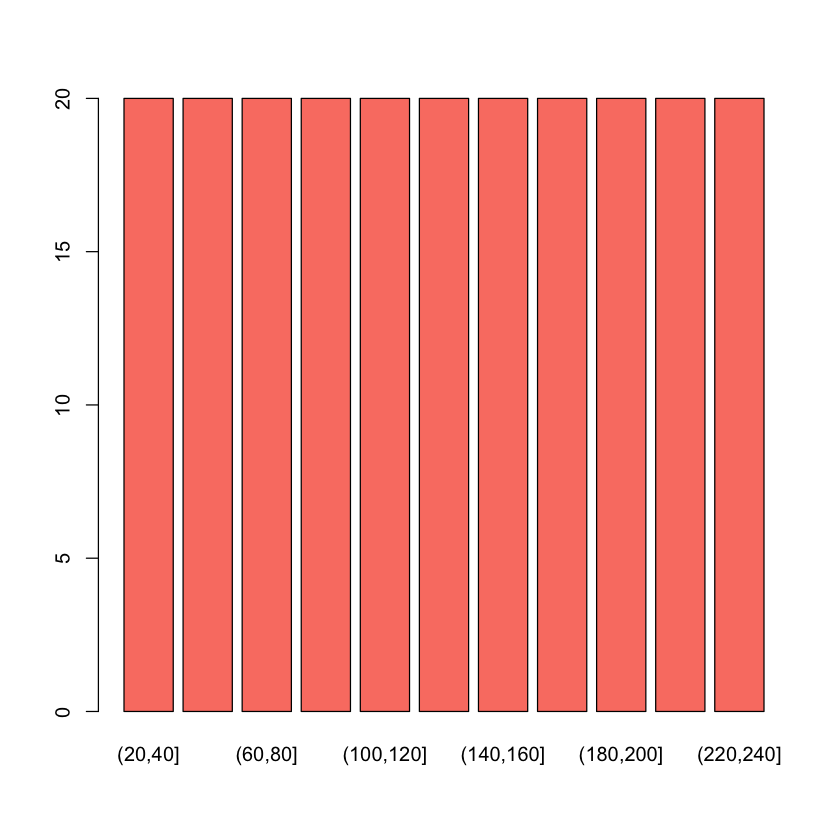

In [100]:
a = c(20:250)
b = table(cut(a, seq(20, 250, 20)))
barplot(b, col = "salmon")

Below is the barplot of our posterior probability.

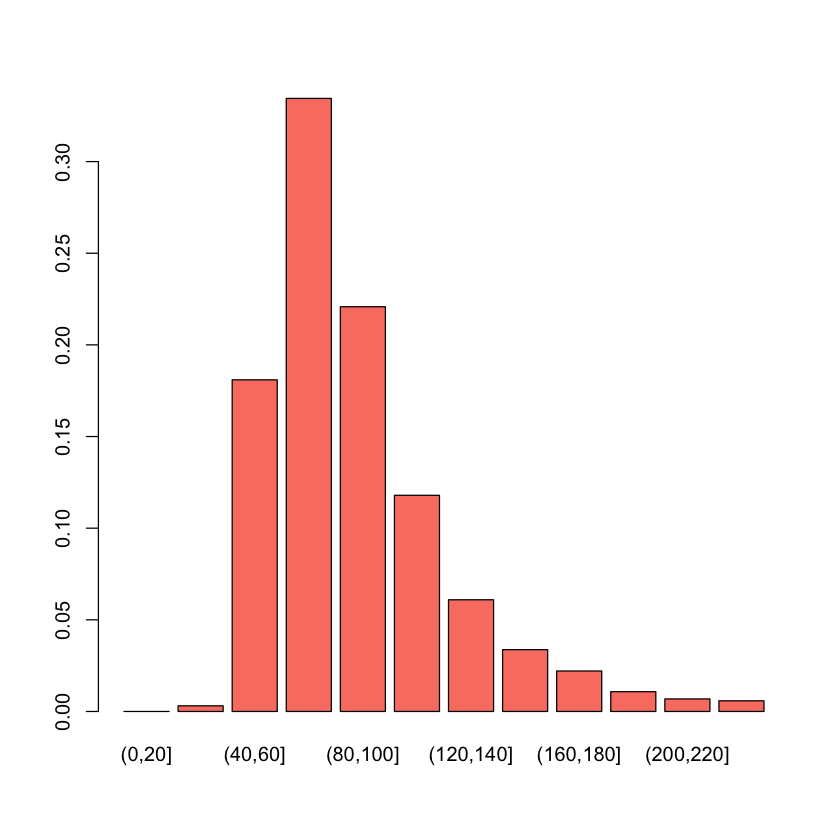

In [101]:
barplot(table(cut(post_fish, seq(0, 250, 20))) / length(post_fish), col = "salmon")

## Shy Fish
As a fun experiment, lets assume that marked fish are half as likely to be caught than unmarked fish. Given the same simulation as above, how does this new constraint affect our posterior probability.

In [102]:
n_draw <- 100000
n_fish <- sample(20:250, n_draw, replace = TRUE)

# Here we set the probability of selecting a tagged fish to 50%
pick_fish <- function(n_fish) {
  fish <- rep(0:1, c(n_fish - 20, 20))
  prob_pick <- ifelse(fish == 0, 1.0, 0.5)
  sum(sample(fish, 20, prob = prob_pick))
}

n_marked <- rep(NA, n_draw)
for(i in 1:n_draw) {
  n_marked[i] <- pick_fish(n_fish[i])
}

post_fish <- n_fish[n_marked == 6]

The barplot below shows that this model estimates a significantly  lower amount of fish in the reservoir. This is due to the new constraint that was put in. Making the probability of re-capturing the 6 tagged fish less (50%). However, this model varies less and thus makes a more confident prediction regarding the number of fish. 

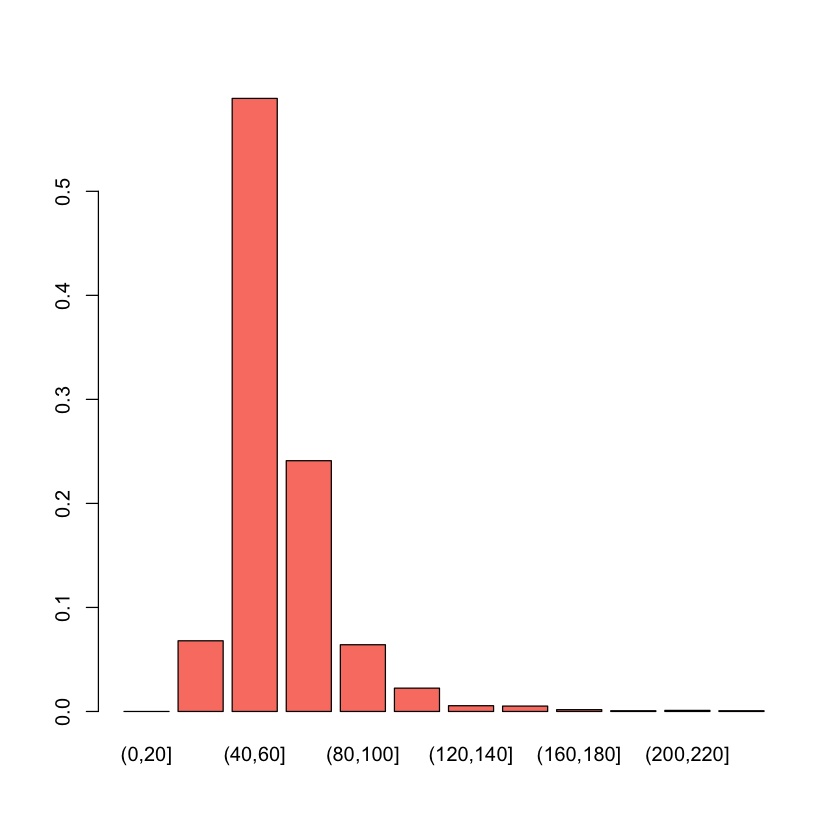

In [103]:
barplot(table(cut(post_fish, seq(0, 250, 20))) / length(post_fish), col = "salmon")

Authors: Dhruv Acharya, Alex Neuman

#IMPORTANT LINKS!!

#http://rpubs.com/rasmusab/live_coding_user_2015_bayes_tutorial
#http://www.sumsar.net/files/academia/user_2015_tutorial_bayesian_data_analysis_short_version.pdf